## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.
C:\Users\ian\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\ian\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\ian\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\ian\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:529: Fu

In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [6]:
x_train.shape[-1]

3072

In [8]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation='relu')(input_layer)
    x = keras.layers.Dense(units=256, activation='relu')(x)
    x = keras.layers.Dense(units=128, activation='relu')(x)
    out = keras.layers.Dense(units=10, activation='softmax')(x)
    
    model = keras.models.Model(inputs=[input_layer],outputs=[out])
    return model
model = build_mlp()

In [9]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_6 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_7 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [15]:
"""
Compile 模型
"""
#optimizer = keras.optimizers.Adam(lr=0.001)
optimizer = keras.optimizers.SGD(lr=0.01,decay=1e-6,momentum=0.9,nesterov=True)
model.compile(loss='categorical_crossentropy',metrics=['accuracy'], optimizer=optimizer)

In [12]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 10s 205us/step - loss: 1.9306 - accuracy: 0.3048 - val_loss: 1.7386 - val_accuracy: 0.3762
Epoch 2/500
50000/50000 [==============================] - 10s 199us/step - loss: 1.7062 - accuracy: 0.3904 - val_loss: 1.6400 - val_accuracy: 0.4154
Epoch 3/500
50000/50000 [==============================] - 10s 194us/step - loss: 1.6238 - accuracy: 0.4195 - val_loss: 1.5601 - val_accuracy: 0.4454
Epoch 4/500
50000/50000 [==============================] - 10s 198us/step - loss: 1.5578 - accuracy: 0.4450 - val_loss: 1.5799 - val_accuracy: 0.4374
Epoch 5/500
50000/50000 [==============================] - 10s 197us/step - loss: 1.5056 - accuracy: 0.4642 - val_loss: 1.4994 - val_accuracy: 0.4681
Epoch 6/500
50000/50000 [==============================] - 10s 197us/step - loss: 1.4710 - accuracy: 0.4755 - val_loss: 1.5461 - val_accuracy: 0.4443
Ep

50000/50000 [==============================] - 10s 199us/step - loss: 0.6182 - accuracy: 0.7788 - val_loss: 1.7844 - val_accuracy: 0.5172
Epoch 54/500
50000/50000 [==============================] - 10s 194us/step - loss: 0.6116 - accuracy: 0.7812 - val_loss: 1.8875 - val_accuracy: 0.5155
Epoch 55/500
50000/50000 [==============================] - 10s 196us/step - loss: 0.5978 - accuracy: 0.7837 - val_loss: 1.8857 - val_accuracy: 0.5151
Epoch 56/500
50000/50000 [==============================] - 10s 198us/step - loss: 0.5863 - accuracy: 0.7892 - val_loss: 1.9248 - val_accuracy: 0.5204
Epoch 57/500
50000/50000 [==============================] - 10s 192us/step - loss: 0.5783 - accuracy: 0.7923 - val_loss: 1.9125 - val_accuracy: 0.5222
Epoch 58/500
50000/50000 [==============================] - 10s 198us/step - loss: 0.5587 - accuracy: 0.7989 - val_loss: 1.9520 - val_accuracy: 0.5138
Epoch 59/500
50000/50000 [==============================] - 10s 198us/step - loss: 0.5611 - accuracy: 0.797

50000/50000 [==============================] - 12s 232us/step - loss: 0.2545 - accuracy: 0.9086 - val_loss: 3.1439 - val_accuracy: 0.5000
Epoch 108/500
50000/50000 [==============================] - 12s 235us/step - loss: 0.2453 - accuracy: 0.9131 - val_loss: 3.2611 - val_accuracy: 0.4996
Epoch 109/500
50000/50000 [==============================] - 12s 232us/step - loss: 0.2659 - accuracy: 0.9049 - val_loss: 3.2537 - val_accuracy: 0.5047
Epoch 110/500
50000/50000 [==============================] - 12s 245us/step - loss: 0.2664 - accuracy: 0.9050 - val_loss: 3.2350 - val_accuracy: 0.4935
Epoch 111/500
50000/50000 [==============================] - 12s 243us/step - loss: 0.2689 - accuracy: 0.9036 - val_loss: 3.2664 - val_accuracy: 0.5039
Epoch 112/500
50000/50000 [==============================] - 11s 228us/step - loss: 0.2478 - accuracy: 0.9111 - val_loss: 3.1965 - val_accuracy: 0.5039
Epoch 113/500
50000/50000 [==============================] - 12s 240us/step - loss: 0.2463 - accuracy:

Epoch 161/500
50000/50000 [==============================] - 12s 239us/step - loss: 0.1656 - accuracy: 0.9412 - val_loss: 4.0605 - val_accuracy: 0.4934
Epoch 162/500
50000/50000 [==============================] - 11s 228us/step - loss: 0.1380 - accuracy: 0.9514 - val_loss: 4.0219 - val_accuracy: 0.4960
Epoch 163/500
50000/50000 [==============================] - 12s 237us/step - loss: 0.2251 - accuracy: 0.9204 - val_loss: 4.1170 - val_accuracy: 0.4923
Epoch 164/500
50000/50000 [==============================] - 12s 235us/step - loss: 0.1989 - accuracy: 0.9299 - val_loss: 3.9876 - val_accuracy: 0.4940
Epoch 165/500
50000/50000 [==============================] - 12s 237us/step - loss: 0.1593 - accuracy: 0.9429 - val_loss: 4.0718 - val_accuracy: 0.4950
Epoch 166/500
50000/50000 [==============================] - 11s 228us/step - loss: 0.2048 - accuracy: 0.9275 - val_loss: 4.0392 - val_accuracy: 0.4999
Epoch 167/500
50000/50000 [==============================] - 12s 239us/step - loss: 0.15

50000/50000 [==============================] - 12s 239us/step - loss: 0.0590 - accuracy: 0.9805 - val_loss: 4.5143 - val_accuracy: 0.5019
Epoch 215/500
50000/50000 [==============================] - 12s 238us/step - loss: 0.0854 - accuracy: 0.9695 - val_loss: 4.4819 - val_accuracy: 0.4921
Epoch 216/500
50000/50000 [==============================] - 11s 227us/step - loss: 0.1912 - accuracy: 0.9373 - val_loss: 4.5604 - val_accuracy: 0.4825
Epoch 217/500
50000/50000 [==============================] - 12s 247us/step - loss: 0.3036 - accuracy: 0.9054 - val_loss: 4.3578 - val_accuracy: 0.4911
Epoch 218/500
50000/50000 [==============================] - 12s 242us/step - loss: 0.1253 - accuracy: 0.9563 - val_loss: 4.4119 - val_accuracy: 0.4996
Epoch 219/500
50000/50000 [==============================] - 12s 244us/step - loss: 0.1090 - accuracy: 0.9613 - val_loss: 4.5498 - val_accuracy: 0.4896
Epoch 220/500
50000/50000 [==============================] - 13s 252us/step - loss: 0.1034 - accuracy:

Epoch 268/500
50000/50000 [==============================] - 12s 233us/step - loss: 0.1840 - accuracy: 0.9403 - val_loss: 4.7859 - val_accuracy: 0.4883
Epoch 269/500
50000/50000 [==============================] - 12s 247us/step - loss: 0.1413 - accuracy: 0.9526 - val_loss: 4.7203 - val_accuracy: 0.4939
Epoch 270/500
50000/50000 [==============================] - 12s 242us/step - loss: 0.0808 - accuracy: 0.9724 - val_loss: 4.7508 - val_accuracy: 0.5035
Epoch 271/500
50000/50000 [==============================] - 13s 260us/step - loss: 0.0697 - accuracy: 0.9755 - val_loss: 4.7803 - val_accuracy: 0.4992
Epoch 272/500
50000/50000 [==============================] - 13s 260us/step - loss: 0.1031 - accuracy: 0.9635 - val_loss: 4.8187 - val_accuracy: 0.4949
Epoch 273/500
50000/50000 [==============================] - 12s 235us/step - loss: 0.1387 - accuracy: 0.9541 - val_loss: 4.8126 - val_accuracy: 0.4869
Epoch 274/500
50000/50000 [==============================] - 12s 246us/step - loss: 0.16

50000/50000 [==============================] - 13s 265us/step - loss: 0.1196 - accuracy: 0.9604 - val_loss: 4.9679 - val_accuracy: 0.4928
Epoch 322/500
50000/50000 [==============================] - 12s 246us/step - loss: 0.1225 - accuracy: 0.9606 - val_loss: 4.9819 - val_accuracy: 0.4895
Epoch 323/500
50000/50000 [==============================] - 13s 254us/step - loss: 0.0952 - accuracy: 0.9670 - val_loss: 4.8960 - val_accuracy: 0.4980
Epoch 324/500
50000/50000 [==============================] - 12s 238us/step - loss: 0.0959 - accuracy: 0.9678 - val_loss: 4.9397 - val_accuracy: 0.4961
Epoch 325/500
50000/50000 [==============================] - 13s 251us/step - loss: 0.0685 - accuracy: 0.9765 - val_loss: 5.0346 - val_accuracy: 0.4942
Epoch 326/500
50000/50000 [==============================] - 13s 270us/step - loss: 0.1321 - accuracy: 0.9569 - val_loss: 5.0777 - val_accuracy: 0.4848
Epoch 327/500
50000/50000 [==============================] - 13s 267us/step - loss: 0.1693 - accuracy:

Epoch 375/500
50000/50000 [==============================] - 11s 213us/step - loss: 0.1697 - accuracy: 0.9517 - val_loss: 5.1364 - val_accuracy: 0.4771
Epoch 376/500
50000/50000 [==============================] - 11s 211us/step - loss: 0.2655 - accuracy: 0.9244 - val_loss: 4.9764 - val_accuracy: 0.4921
Epoch 377/500
50000/50000 [==============================] - 11s 223us/step - loss: 0.0956 - accuracy: 0.9675 - val_loss: 4.9378 - val_accuracy: 0.4961
Epoch 378/500
50000/50000 [==============================] - 11s 218us/step - loss: 0.0622 - accuracy: 0.9783 - val_loss: 5.0285 - val_accuracy: 0.4949
Epoch 379/500
50000/50000 [==============================] - 11s 216us/step - loss: 0.0535 - accuracy: 0.9814 - val_loss: 4.9616 - val_accuracy: 0.4964
Epoch 380/500
50000/50000 [==============================] - 10s 208us/step - loss: 0.0430 - accuracy: 0.9853 - val_loss: 4.9795 - val_accuracy: 0.5011
Epoch 381/500
50000/50000 [==============================] - 10s 206us/step - loss: 0.02

Epoch 429/500
50000/50000 [==============================] - 9s 174us/step - loss: 0.1072 - accuracy: 0.9631 - val_loss: 4.5232 - val_accuracy: 0.4973
Epoch 430/500
50000/50000 [==============================] - 8s 168us/step - loss: 0.0486 - accuracy: 0.9845 - val_loss: 4.5495 - val_accuracy: 0.5034
Epoch 431/500
50000/50000 [==============================] - 9s 173us/step - loss: 0.0169 - accuracy: 0.9970 - val_loss: 4.6167 - val_accuracy: 0.5041
Epoch 432/500
50000/50000 [==============================] - 8s 169us/step - loss: 0.0105 - accuracy: 0.9986 - val_loss: 4.6560 - val_accuracy: 0.5005
Epoch 433/500
50000/50000 [==============================] - 9s 172us/step - loss: 0.0071 - accuracy: 0.9996 - val_loss: 4.6953 - val_accuracy: 0.5008
Epoch 434/500
50000/50000 [==============================] - 8s 169us/step - loss: 0.0067 - accuracy: 0.9995 - val_loss: 4.7401 - val_accuracy: 0.5064
Epoch 435/500
50000/50000 [==============================] - 9s 172us/step - loss: 0.0045 - ac

50000/50000 [==============================] - 10s 200us/step - loss: 0.2693 - accuracy: 0.9154 - val_loss: 4.2682 - val_accuracy: 0.4933
Epoch 484/500
50000/50000 [==============================] - 10s 197us/step - loss: 0.0699 - accuracy: 0.9771 - val_loss: 4.3316 - val_accuracy: 0.4982
Epoch 485/500
50000/50000 [==============================] - 10s 199us/step - loss: 0.0202 - accuracy: 0.9962 - val_loss: 4.4364 - val_accuracy: 0.5025
Epoch 486/500
50000/50000 [==============================] - 10s 202us/step - loss: 0.0184 - accuracy: 0.9965 - val_loss: 4.4865 - val_accuracy: 0.5047
Epoch 487/500
50000/50000 [==============================] - 10s 198us/step - loss: 0.0077 - accuracy: 0.9996 - val_loss: 4.5785 - val_accuracy: 0.5056
Epoch 488/500
50000/50000 [==============================] - 10s 209us/step - loss: 0.0052 - accuracy: 0.9999 - val_loss: 4.6167 - val_accuracy: 0.5053
Epoch 489/500
50000/50000 [==============================] - 10s 202us/step - loss: 0.0043 - accuracy:

In [16]:
model.fit(x_train, y_train,
          epochs=100,
         batch_size=256,
         validation_data=(x_test,y_test),
         shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 8s 158us/step - loss: 0.0056 - accuracy: 0.9999 - val_loss: 4.5977 - val_accuracy: 0.5038
Epoch 2/100
50000/50000 [==============================] - 8s 154us/step - loss: 0.0038 - accuracy: 1.0000 - val_loss: 4.6730 - val_accuracy: 0.5056
Epoch 3/100
50000/50000 [==============================] - 8s 154us/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 4.7373 - val_accuracy: 0.5072
Epoch 4/100
50000/50000 [==============================] - 7s 146us/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 4.7928 - val_accuracy: 0.5045
Epoch 5/100
50000/50000 [==============================] - 7s 150us/step - loss: 0.0025 - accuracy: 0.9999 - val_loss: 4.8390 - val_accuracy: 0.5068
Epoch 6/100
50000/50000 [==============================] - 7s 146us/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 4.8768 - val_accuracy: 0.5058
Epoch 7/100
50000/50000 [==============================]

50000/50000 [==============================] - 7s 148us/step - loss: 3.8130e-04 - accuracy: 1.0000 - val_loss: 5.4031 - val_accuracy: 0.5058
Epoch 55/100
50000/50000 [==============================] - 7s 145us/step - loss: 3.7682e-04 - accuracy: 1.0000 - val_loss: 5.4077 - val_accuracy: 0.5055
Epoch 56/100
50000/50000 [==============================] - 7s 148us/step - loss: 3.6919e-04 - accuracy: 1.0000 - val_loss: 5.4127 - val_accuracy: 0.5056
Epoch 57/100
50000/50000 [==============================] - 7s 146us/step - loss: 3.6379e-04 - accuracy: 1.0000 - val_loss: 5.4163 - val_accuracy: 0.5053
Epoch 58/100
50000/50000 [==============================] - 7s 147us/step - loss: 3.5747e-04 - accuracy: 1.0000 - val_loss: 5.4207 - val_accuracy: 0.5054
Epoch 59/100
50000/50000 [==============================] - 7s 146us/step - loss: 3.5244e-04 - accuracy: 1.0000 - val_loss: 5.4235 - val_accuracy: 0.5056
Epoch 60/100
50000/50000 [==============================] - 7s 145us/step - loss: 3.4637e

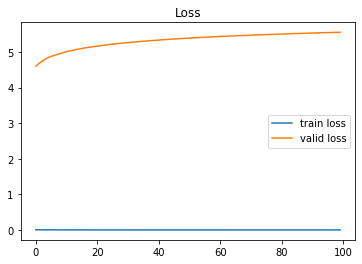

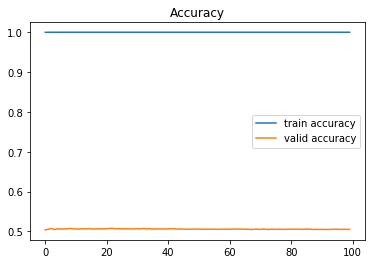

In [20]:
import matplotlib.pyplot as plt

train_loss = model.history.history['loss']
valid_loss = model.history.history['val_loss']

train_acc = model.history.history['accuracy']
valid_acc = model.history.history['val_accuracy']

plt.plot(range(len(train_loss)),train_loss,label='train loss')
plt.plot(range(len(valid_loss)),valid_loss,label='valid loss')
plt.legend()
plt.title('Loss')
plt.show()


plt.plot(range(len(train_acc)),train_acc, label='train accuracy')
plt.plot(range(len(valid_acc)),valid_acc, label='valid accuracy')
plt.legend()
plt.title('Accuracy')
plt.show()

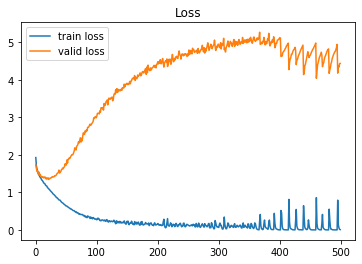

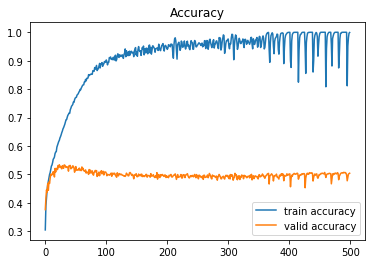

In [14]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()